In [1]:
import pandas as pd

data = pd.read_pickle("out/results.pkl")
data["Instance"] = data["Instance"].str.replace("_", "\_")
data


,Instance,Method,Time limit (s),AUC (%),Time (s),Nodes visited,Original tree size,Compressed tree size,Compression ratio (%)
0,air05,DFS,900,100.000000,900.0,2,227,227,0.000000
1,air05,Random,900,92.541246,900.0,7,227,204,10.132159
2,air05,NodeId,900,84.125415,900.0,31,227,186,18.061674
3,air05,SubtreeSize,900,80.372165,900.0,45,227,168,25.991189
4,air05,Gap,900,74.020442,900.0,52,227,154,32.158590
...,...,...,...,...,...,...,...,...,...
1399,tr12-30,Random,14400,78.542586,14400.0,4387,10001,6104,38.966103
1400,tr12-30,NodeId,14400,62.270011,14400.0,4961,10001,6055,39.456054
1401,tr12-30,SubtreeSize,14400,61.457857,14400.0,4961,10001,6055,39.456054
1402,tr12-30,Gap,14400,60.902412,14400.0,4961,10001,6055,39.456054


In [2]:
summary = (
    data.groupby(["Method", "Time limit (s)"])
    .mean()[["AUC (%)", "Compression ratio (%)"]]
    .unstack()
)
summary = summary.sort_values(by=("AUC (%)", 3600)).reset_index()
summary = summary.rename(
    columns={
        "AUC (%)": "AUC",
        "Compression ratio (%)": "CR",
    }
)
summary.columns = [f"{i1}{i2}" for (i1, i2) in summary.columns]
summary.to_csv("out/miplib2017-summary.csv", index=False, float_format="%.1f")
summary

,Method,AUC900,AUC3600,AUC14400,CR900,CR3600,CR14400
0,Expert,72.119751,65.369378,58.655852,30.795989,34.405081,35.142279
1,Gap,83.705463,76.289534,66.239523,18.988766,25.786412,30.465066
2,NodeId,86.519233,79.555688,69.610344,15.499037,21.592113,27.902941
3,SubtreeSize,86.992635,79.624753,69.354811,15.559749,21.719852,28.060804
4,Random,89.022630,80.807166,69.886651,13.237952,21.278837,28.305284
5,DFS,89.791450,83.323353,73.481176,12.851689,17.059839,24.005796


In [3]:
summary = data[data["Time limit (s)"] == 3600]
summary = (
    summary.groupby(["Instance", "Method"])[["AUC (%)", "Compression ratio (%)"]]
    .mean()
    .unstack()
)
summary.loc["Mean", :] = summary.mean(axis=0)
summary = summary.rename(
    columns={
        "AUC (%)": "Auc",
        "Compression ratio (%)": "Cr",
    }
)
summary.columns = [f"{i1}{i2}" for (i1, i2) in summary.columns]
summary = summary.reset_index()
n = len(summary) // 2

summary.iloc[:n, :].to_csv(
    "out/miplib2017-full-a.csv", index=False, float_format="%.1f"
)
summary.iloc[n:, :].to_csv(
    "out/miplib2017-full-b.csv", index=False, float_format="%.1f"
)
summary.to_csv("out/miplib2017-full.csv", index=False, float_format="%.1f")
summary


,Instance,AucDFS,AucExpert,AucGap,AucNodeId,AucRandom,AucSubtreeSize,CrDFS,CrExpert,CrGap,CrNodeId,CrRandom,CrSubtreeSize
0,50v-10,97.243624,75.409897,77.059900,80.188472,94.567192,79.361477,5.989401,25.127487,24.977502,22.367763,10.128987,24.517548
1,air05,100.000000,65.758123,69.386015,81.635642,94.740016,73.023175,0.000000,35.242291,32.158590,23.348018,8.810573,32.158590
2,app1-1,6.330409,0.229391,0.722408,5.873638,0.376875,12.929136,98.497393,98.497393,98.497393,98.497393,98.497393,98.497393
3,assign1-5-8,95.700570,49.981207,56.748421,65.035527,88.888556,63.404158,8.292439,50.635954,49.003505,44.877316,21.882824,47.361042
4,b1c1s1,99.266008,65.438316,76.585620,84.430743,97.835402,79.163192,1.909809,41.685831,29.797020,22.817718,4.219578,28.087191
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,swath1,100.000000,34.293701,76.568744,77.268892,65.934785,77.695352,0.000000,88.481152,30.336966,29.357064,44.715528,28.357164
75,swath3,100.000000,61.482054,95.077043,95.184686,76.457159,91.628021,0.000000,57.574243,8.819118,8.529147,43.805619,12.138786
76,tr12-30,95.185509,61.365745,61.977821,66.992087,94.273284,64.124284,9.699030,39.456054,39.456054,38.806119,11.498850,39.286071
77,var-smallemery-m6j6,100.000000,99.910827,99.910828,99.924519,100.000000,99.927209,0.000000,0.099990,0.099990,0.079992,0.000000,0.099990


In [4]:
filtered = data  # [(data["Method"] == "Expert") | (data["Method"] == "Gap")]
filtered = filtered[filtered["Time limit (s)"] == 3600]
filtered["Instance"] = filtered["Instance"].str.replace("\\_", "_", regex=False)
filtered = (
    filtered.groupby(["Instance", "Method"])[["Compression ratio (%)"]].mean().unstack()
)
filtered.columns = [c[1] for c in filtered.columns]
filtered.sort_values(by="Expert", inplace=True)
instances = filtered.index
filtered


/tmp/ipykernel_47660/2190338466.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered["Instance"] = filtered["Instance"].str.replace("\\_", "_", regex=False)


,DFS,Expert,Gap,NodeId,Random,SubtreeSize
Instance,,,,,,
neos-5093327-huahum,0.010094,0.040375,0.040375,0.040375,0.000000,0.040375
var-smallemery-m6j6,0.000000,0.099990,0.099990,0.079992,0.000000,0.099990
roi5alpha10n8,0.000000,0.159984,0.159984,0.079992,0.000000,0.159984
sp97ar,0.000000,0.189981,0.189981,0.119988,0.000000,0.189981
sp98ar,0.000000,0.350035,0.280028,0.140014,0.050005,0.150015
...,...,...,...,...,...,...
app1-1,98.497393,98.497393,98.497393,98.497393,98.497393,98.497393
neos-1456979,99.220904,99.220904,86.551600,57.413400,99.220904,53.817572
comp21-2idx,99.787460,99.787460,99.787460,5.951116,99.787460,5.526036


/home/axavier/.conda/envs/miplearn2/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


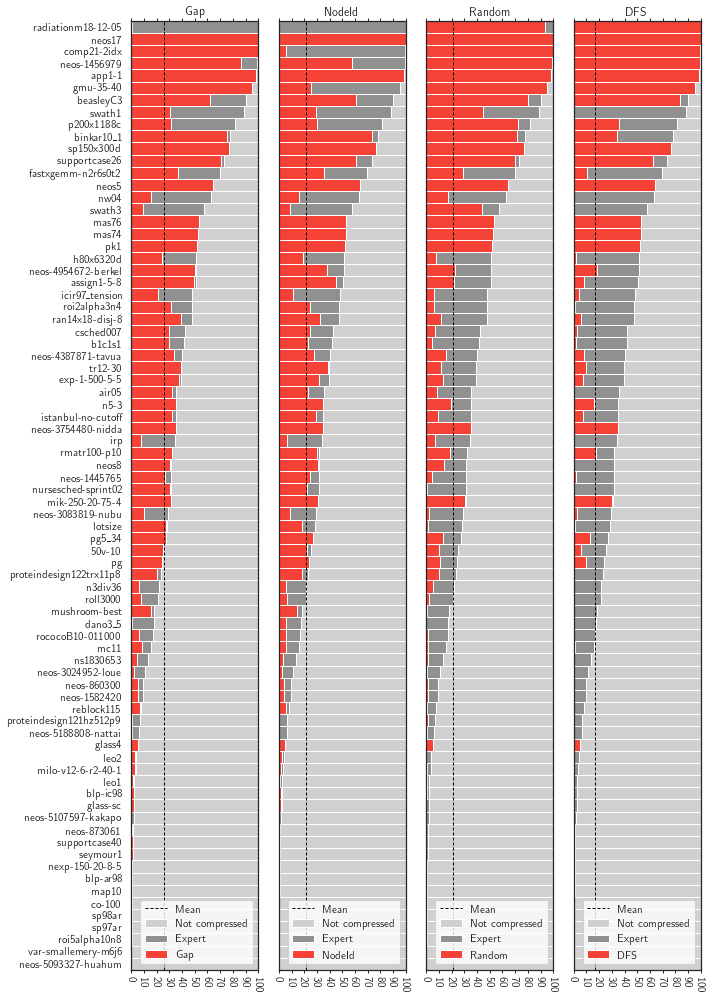

In [5]:
from math import floor, ceil
import numpy as np
from time import time
from glob import glob
from p_tqdm import p_umap
import pandas as pd
from random import shuffle
from glob import glob
import json
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
sns.set_style("white")
plt.rcParams["text.usetex"] = True

method_colors = {
    "supp:inf": "#F44336",  # red
    "supp:2": "#673AB7",  # purple
    "supp:1": "#03A9F4",  # blue
    "drop": "#009688",  # green
    "heuristic": "#FF9800",  # orange
}

methods = ["Gap", "NodeId", "Random", "DFS"]

fig, ax = plt.subplots(nrows=1, ncols=len(methods), figsize=(10, 14), sharey=True)
for i, method in enumerate(methods):
    ax[i].barh(instances, height=1.0, width=100.0, color="#D0D0D0")
    ax[i].barh(instances, height=1.0, width=filtered["Expert"], color="#909090")
    ax[i].barh(instances, height=1.0, width=filtered[method], color="#F44336")
    ax[i].margins(y=0, x=0)
    ax[i].set_title(method)

    ax[i].tick_params(
        reset=True,
        axis="x",
        direction="out",
        length=3,
        width=1,
        # colors='r',
        # grid_color='r',
        # grid_alpha=0.5,
    )
    xticks = np.arange(0, 101, step=10)
    ax[i].set_xticks(xticks)
    ax[i].set_xticklabels([f"{i}" for i in xticks], rotation=-90)

    mm = filtered[method].mean()
    ax[i].axline((mm, 0), (mm, 1), color="black", dashes=(3, 2), linewidth=1)

    ax[i].legend(["Mean", "Not compressed", "Expert", method], loc="lower right")
fig.tight_layout()
plt.savefig("out/miplib2017.pdf")


In [18]:
compare = filtered.copy()
compare = compare.loc[:, "Gap"] - compare.loc[:, ["NodeId", "Random", "DFS"]].max(axis=1)
compare.sort_values().head(10)

Instance
radiationm18-12-05        -99.704353
p200x1188c                -40.805919
swath3                    -34.986501
beasleyC3                 -22.312394
swath1                    -14.378562
neos-1456979              -12.669304
dano3_5                    -4.918033
nw04                       -1.773836
proteindesign121hz512p9    -1.100110
neos-873061                -0.499950
dtype: float64